기말고사 대체 과제 201920960 어형준

1. 데이터 : 
자신의 학번이 홀수로 끝나는 학생은 amazon_uk_shoes_products_dataset_2021_12.csv를
짝수로 끝나는 학생은 wine_review.csv를 분석합니다.
분석해야 하는 자료는 classroom repository에 있습니다.

In [44]:
## 필요한 라이브러리 설치 ##
%pip install pandas nltk

## 필요한 라이브러리 임포트 ##
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## nltk 데이터 다운로드 ##
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hjkin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hjkin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hjkin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
## 데이터 로드 ##

# wine_review.csv파일 불러오기
df = pd.read_csv('wine_review.csv')

# 불러온 데이터 확인
print(df)


                        id asins                 brand  \
0     AV13ClKCGV-KLJ3akN68   NaN                 Gallo   
1     AV13CsvW-jtxr-f38AQO   NaN       Fresh Craft Co.   
2     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
3     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
4     AV13CYL4-jtxr-f37_-t   NaN          Wine Cube153   
...                    ...   ...                   ...   
2885  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2886  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2887  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2888  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2889  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   

                                             categories             dateAdded  \
0     Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:11Z   
1     Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:42Z   
2     Food & Beverage,Beverages,Wine, Beer & Liquor,...  201

In [48]:
## 컬럼 이름 확인 ##
print(df.columns)

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')


2. 데이터 전처리 : 데이터 정리 (노이즈 제거, 결측값 처리 등).
텍스트 토큰화 및 불용어 제거.
텍스트 정규화 (스테밍 또는 표제어 추출).

In [55]:
## 데이터 전처리 ##

# 필요한 컬럼만 선택
df = df[['reviews.text', 'reviews.rating']]

# 결측치 처리
df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)

# 감성 데이터 전처리
def label_sentiment(rating):
    if rating >= 3:         # 3점 이상 긍정적 평가
        return 'positive'
    else:
        return 'negative'    # 2점 이하 부정적 평가

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

# 텍스트 정리
def preprocess_text(text):
    text = text.lower() # 소문자 변환
    text = re.sub(r'[^a-zA-Z\s]', '', text) # 특수 문자 및 숫자 제거
    words = word_tokenize(text) # 단어 토큰화
    words = [word for word in words if word not in stopwords.words('english')] # 불용어 제거   
    lemmatizer = WordNetLemmatizer() # 텍스트 정규화 (표제어 추출)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# 데이터 전처리 적용
df['cleared_text'] = df['reviews.text'].apply(preprocess_text)

# 데이터셋 분할
x = df['cleared_text']
y = df['sentiment']

# 전처리된 데이터를 새로운 csv 파일로 저장
df.to_csv('cleard_review.csv', index=False)


3. 모델 구현:
수업에서 활용한 모델을 적용

In [58]:
# 전처리된 데이터 불러오기
df =  pd.read_csv('cleard_review.csv')

# 결측값 처리
df.dropna(subset=['cleared_text'], inplace=True)

# 데이터셋 분할
x = df['cleared_text']
y = df['sentiment']


4. 모델 학습 및 튜닝 : 
데이터셋을 학습 및 테스트 세트로 분할.
모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).
교차 검증과 같은 기술을 사용하여 견고성 보장.

In [60]:
# 학습 세트와  테스트 세트 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC())
])

# 하이퍼파라미터 튜닝
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# 그리드서치로 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf'],
                         'tfidf__max_df': [0.8, 0.9, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

5. 모델 평가 : 정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.

In [64]:
# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pre = best_model.predict(x_test)

# 모델 평가
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pre)}")
print(classification_report(y_test, y_pre))

# 모델 평가 (교차 검증)
cross_val_scores = cross_val_score(best_model, x, y, cv=6, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Best Parameters: {'svc__C': 10, 'svc__kernel': 'rbf', 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}
Accuracy: 0.956343792633015
              precision    recall  f1-score   support

    negative       1.00      0.06      0.11        34
    positive       0.96      1.00      0.98       699

    accuracy                           0.96       733
   macro avg       0.98      0.53      0.54       733
weighted avg       0.96      0.96      0.94       733

Cross-validation scores: [0.95343137 0.94594595 0.94840295 0.95331695 0.95331695 0.95331695]
Mean cross-validation score: 0.9512885211414623


6. 시각화 : Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화.
혼동 행렬 및 ROC 곡선 생성.

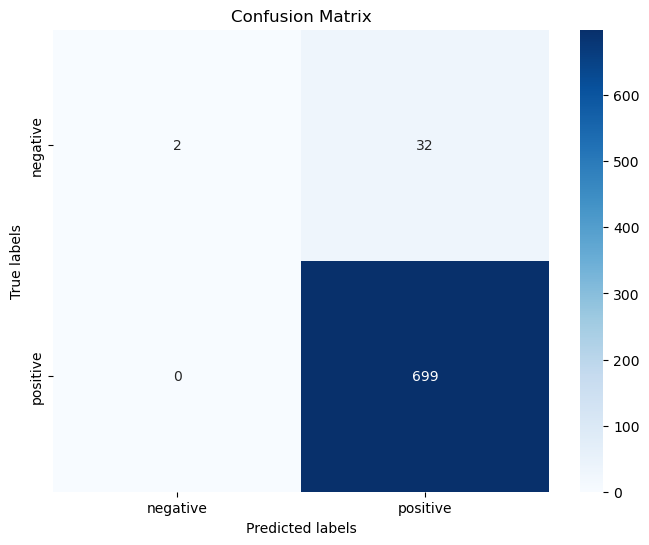

In [65]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pre, labels=best_model.classes_)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

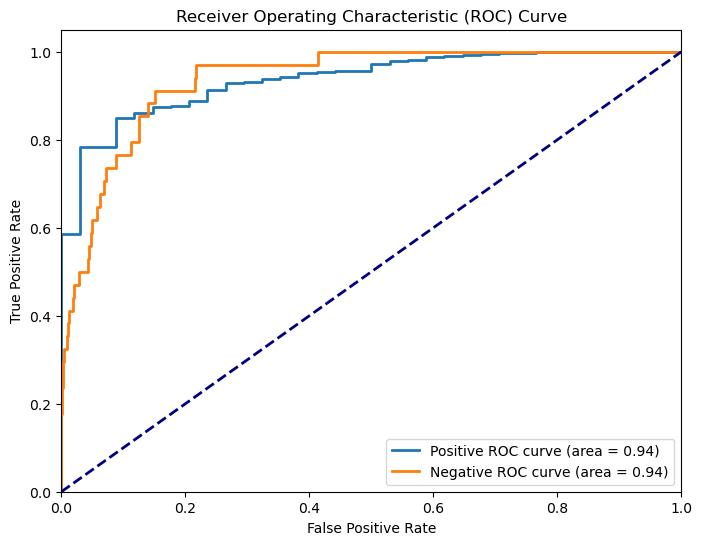

In [67]:
## ROC 곡선 생성 및 시각화

# 긍정 부정 확률 계산
y_scores = best_model.decision_function(x_test)

# 긍정 ROC 곡선
y_test_positive = (y_test == 'positive').astype(int) # y_test를 1차원 배열로 변환
fpr_positive, tpr_positive, _ = roc_curve(y_test_positive, y_scores)
roc_auc_positive = auc(fpr_positive, tpr_positive)

# 부정 ROC 곡선
y_test_negative = (y_test == 'negative').astype(int)
fpr_negative, tpr_negative, _ = roc_curve(y_test_negative, -y_scores)  # 부정 클래스의 경우, 점수를 반대로 사용
roc_auc_negative = auc(fpr_negative, tpr_negative)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_positive, tpr_positive, lw=2, label=f'Positive ROC curve (area = {roc_auc_positive:.2f})')
plt.plot(fpr_negative, tpr_negative, lw=2, label=f'Negative ROC curve (area = {roc_auc_negative:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
